# Simphony circuit simulator

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) is a circuit simulator based on [scikit-rf](https://scikit-rf.readthedocs.io/en/latest/)

The main advantage of simphony over [SAX](https://flaport.github.io/sax/) is that simphony works in Windows, Linux and MacOs. While SAX only works on MacOs and Linux.

It also supports the SiEPIC PDK library natively.

## Component models

You can use component models from :

- Sparameters from Lumerical FDTD simulations thanks to the gdsfactory Lumerical plugin
- [SiPANN](https://sipann.readthedocs.io/en/latest/?badge=latest) open source package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc

2022-03-03 06:48:10.557 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 4.3.0


2022-03-03 06:48:12.119074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 06:48:12.119109: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
c = gf.components.mzi()
n = c.get_netlist()

### Straight

Lets start with the Sparameter model of a straight waveguide.

The models are for lossless elements.

2022-03-03 06:48:14.384 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


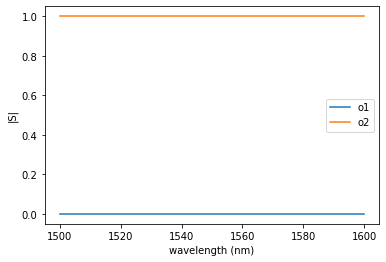

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [3]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128)*1e-9
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-03-03 06:48:14.496 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


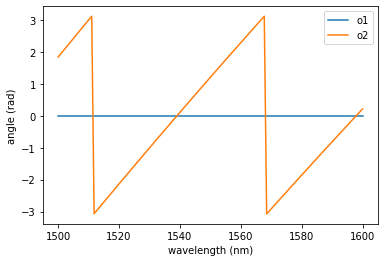

<AxesSubplot:xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [4]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128)*1e-9
gs.plot_model(m, phase=True, wavelengths=wavelengths)

### Bend

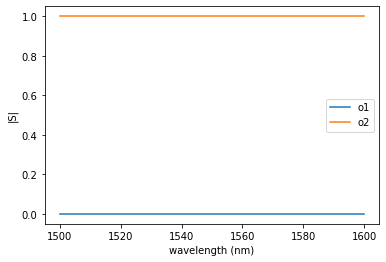

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [5]:
m = gc.bend_circular(radius=2) # this bend should have some loss
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

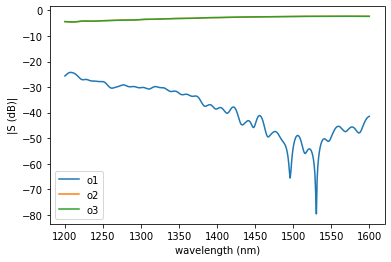

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [6]:
m = gc.mmi1x2() # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in='o1')

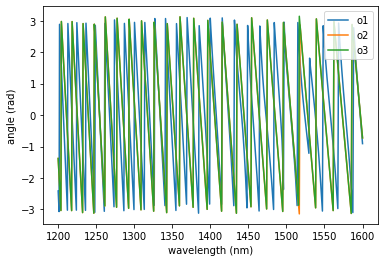

(1540.0, 1570.0)

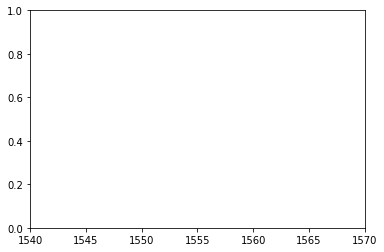

In [7]:
m = gc.mmi1x2()
gs.plot_model(m, pin_in='o1', phase=True)
plt.xlim([1540, 1570])

In [8]:
m.pins

('o1', 'o2', 'o3')

As you can see the MMI has -20dB reflection and -3dB transmission

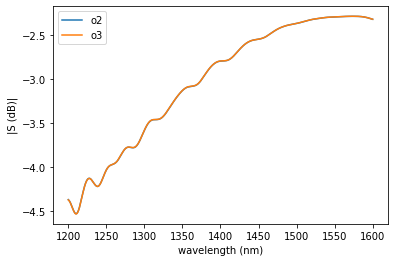

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [9]:
gs.plot_model(m, pins=('o2', 'o3'))

In [10]:
m.pins

('o1', 'o2', 'o3')

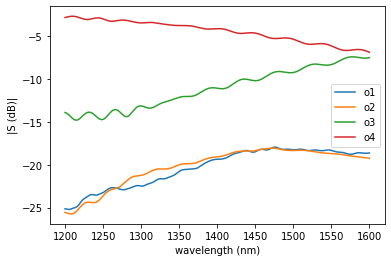

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [11]:
m = gc.mmi2x2() # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m)

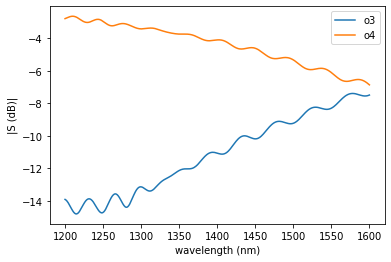

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [12]:
gs.plot_model(m, pins=('o3', 'o4'))

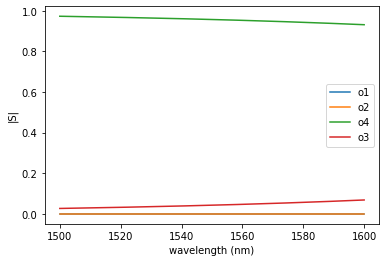

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [13]:
m = gc.coupler_ring()
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

In [14]:
gc.coupler_ring?

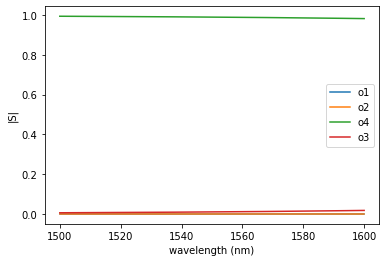

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [15]:
m = gc.coupler_ring(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

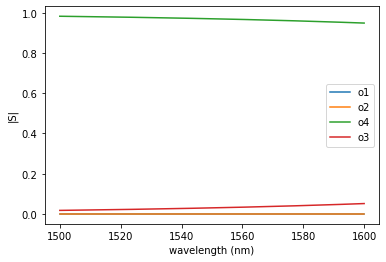

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [16]:
m = gc.coupler(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

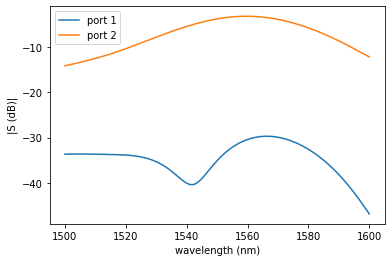

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [17]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in ='port 1')

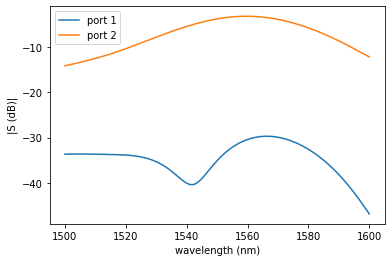

(-10.0, -3.0)

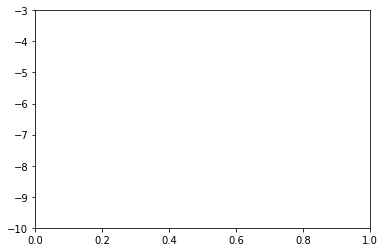

In [18]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in ='port 1')
plt.ylim([-10, -3])

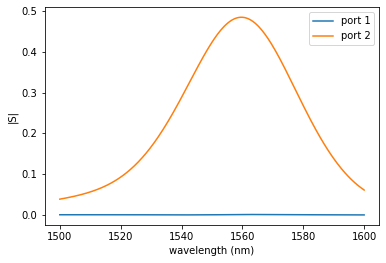

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [19]:
m = gc.gc1550te()
gs.plot_model(m, logscale=False, pin_in ='port 1')

## Circuit simulations

With Simphony you can also combine components into circuits

### MZI interferometer

In [20]:
import matplotlib.pyplot as plt
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
import gdsfactory as gf

2022-03-03 06:48:16.261 | INFO     | gdsfactory.show:show:36 - Klayout show mzi: uid 3, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references


mzi: uid 3, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references


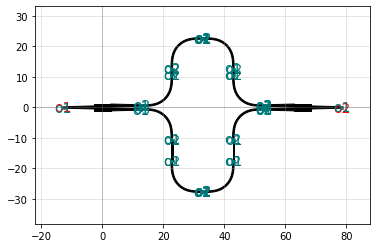

mzi: uid 3, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [21]:
c = gf.components.mzi(delta_length=10)
c

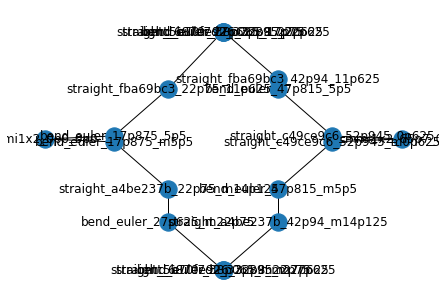

In [22]:
c.plot_netlist()

2022-03-03 06:48:16.779 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-03-03 06:48:16.780 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


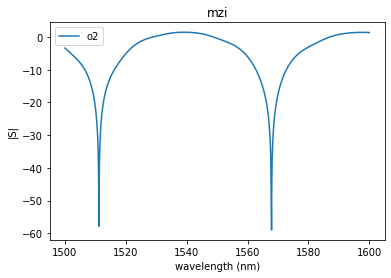

<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [23]:
circuit = gs.components.mzi(delta_length=10, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

2022-03-03 06:48:16.926 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-03-03 06:48:16.927 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


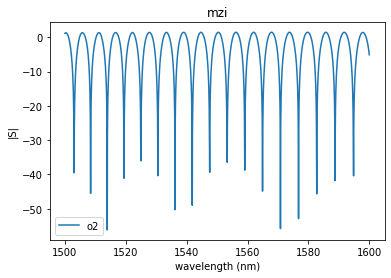

<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [24]:
circuit = gs.components.mzi(delta_length=100, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

Lets add grating couplers to the mzi circuit.

2022-03-03 06:48:17.104 | INFO     | gdsfactory.show:show:36 - Klayout show mzi_9f5eba71_move_d086a_1a921fd2: uid 26, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references


mzi_9f5eba71_move_d086a_1a921fd2: uid 26, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references


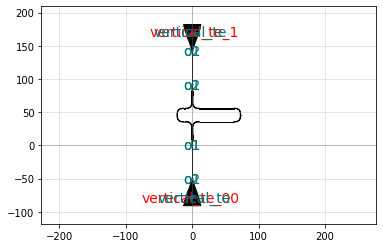

mzi_9f5eba71_move_d086a_1a921fd2: uid 26, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references

In [25]:
mzi_layout= gf.components.mzi(delta_length=100)
mzi_with_gc_layout = gf.routing.add_fiber_single(component=mzi_layout, with_loopback=False)
mzi_with_gc_layout

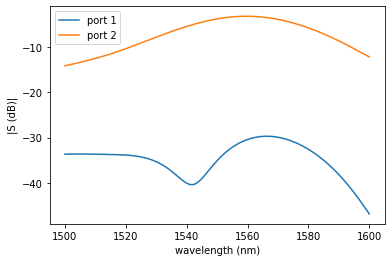

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [26]:
c = gc.gc1550te()
gs.plot_model(c, pin_in='port 1')

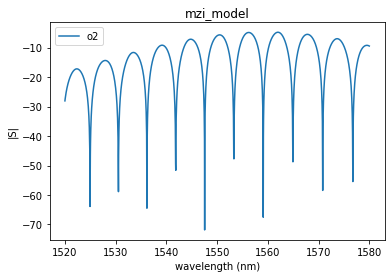

<AxesSubplot:title={'center':'mzi_model'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [27]:
circuit_gc = gs.add_gc(circuit=circuit, gc=gs.components.gc1550te)

gs.plot_circuit(
    circuit_gc,
    start=1520e-9,
    stop=1580e-9,
    logscale=True,
)

### MZI intereferometer from layout

In [28]:
from simphony.library import siepic
from simphony.netlist import Subcircuit
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs

c = gf.components.mzi(delta_length=10)
cm = gs.component_to_circuit(c)

2022-03-03 06:48:17.841 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.842 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.844 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.844 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.846 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.846 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.847 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.848 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.849 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


2022-03-03 06:48:17.849 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['npoints', 'with_cladding_box', 'cross_section'])


In [29]:
cm.pins

{<Pin 'o1' at <Element 'mmi1x2_0p0_0p0' at 0x7f085e437af0>>,
 <Pin 'o1' at <Element 'mmi1x2_65p7_0p0' at 0x7f085e437c70>>}

In [30]:
p2 = cm.pins.pop()
p2.name = 'o2'

In [31]:
cm.pins

{<Pin 'o1' at <Element 'mmi1x2_65p7_0p0' at 0x7f085e437c70>>,
 <Pin 'o2' at <Element 'mmi1x2_0p0_0p0' at 0x7f085e437af0>>}

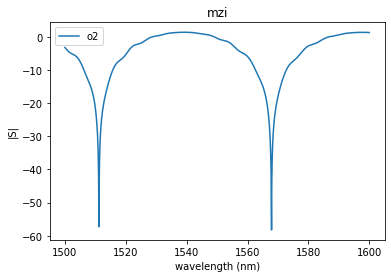

<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [32]:
gs.plot_circuit(cm)

### Ring resonator


2022-03-03 06:48:18.075 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:54: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


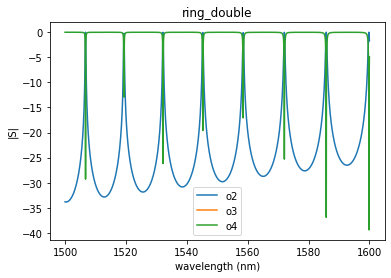

<AxesSubplot:title={'center':'ring_double'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [33]:
c = gc.ring_double(radius=5)
gs.plot_circuit(c, pins_out=['o2', 'o3', 'o4'])

2022-03-03 06:48:18.316 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:54: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


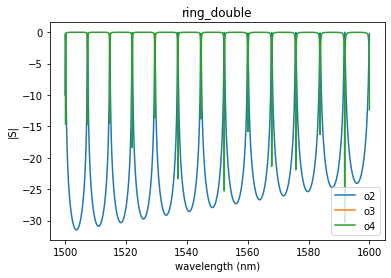

<AxesSubplot:title={'center':'ring_double'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [34]:
c = gs.components.ring_double(radius=10)
gs.plot_circuit(c, pins_out=['o2', 'o3', 'o4'])